In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
traindata=pd.read_csv("E:\\hackerearth\\mothers day\\dataset\\train.csv")

In [3]:
traindata

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1
...,...,...,...,...,...,...
3230,1.245745e+18,"To all my sisters ,my sisters -in -law and als...",en,0,TheBookTweeters,0
3231,1.244368e+18,"Happy Mother’s Day to all the Mums, Step Mums,...",en,0,MPWTW,1
3232,1.245675e+18,Happy Mothers Day to the craziest woman I know...,en,0,localcreativity,0
3233,1.243976e+18,Happy Mother's Day to my amazing wife! We both...,en,0,LoveluK77651882,0


In [4]:
traindata.isnull().any()
traindata.dropna(inplace=True)
traindata.reset_index(inplace=True)
traindata.isnull().any()

index              False
id                 False
original_text      False
lang               False
retweet_count      False
original_author    False
sentiment_class    False
dtype: bool

In [5]:
traindata

,index,id,original_text,lang,retweet_count,original_author,sentiment_class
0,0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1
...,...,...,...,...,...,...,...
3222,3230,1.245745e+18,"To all my sisters ,my sisters -in -law and als...",en,0,TheBookTweeters,0
3223,3231,1.244368e+18,"Happy Mother’s Day to all the Mums, Step Mums,...",en,0,MPWTW,1
3224,3232,1.245675e+18,Happy Mothers Day to the craziest woman I know...,en,0,localcreativity,0
3225,3233,1.243976e+18,Happy Mother's Day to my amazing wife! We both...,en,0,LoveluK77651882,0


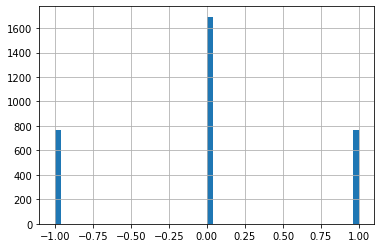

In [6]:
traindata.sentiment_class.hist(bins=50)

In [7]:
traindata.retweet_count.describe()

count     3227
unique      68
top          0
freq      2521
Name: retweet_count, dtype: object

In [8]:
test=pd.read_csv("E:\\hackerearth\\mothers day\\dataset\\test.csv")

In [9]:
test.isnull().any()

id                 False
original_text      False
lang               False
retweet_count       True
original_author    False
dtype: bool

In [10]:
test.fillna(0,inplace=True)

In [11]:
test.isnull().any()

id                 False
original_text      False
lang               False
retweet_count      False
original_author    False
dtype: bool

In [12]:
test.tail()

,id,original_text,lang,retweet_count,original_author
1382,1.245219e+18,Happy Mother’s Day you crazy bitch I’m sorry c...,en,0,MarlosFinds
1383,1.245882e+18,"Mum can't get to the bingo, so we brought the ...",-0.8393813523,en,1
1384,1.246461e+18,Despite all this bullshit today has been one o...,en,0,LToddWood
1385,1.246245e+18,Happy Mothers Day Firstly to my Queen daniele_...,en,0,LToddWood
1386,1.245178e+18,Mothers Day Walk When you live in a tiny villa...,en,0,HerHistoryatYC


In [13]:
fdata=traindata.append(test,sort=False)

fdata.reset_index(inplace=True)

In [14]:
X=fdata.original_text
y_train=traindata.sentiment_class

In [15]:
import re
import nltk
nltk.download('stopwords') #contain irrelvant words  & ava in diff lang
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = [] #corpus collection of strings
for i in range(0,4614):
    review = re.sub('[^a-zA-Z]', ' ', str(X[i])) #remove  except a-z & A-Z & create space b/w words
    review = review.lower() #capital to lower
    review = review.split()  #sentence to words
    ps = PorterStemmer()  # loved to love (diff kind of same word into standard word)
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] #take words not in stopward
    review = ' '.join(review) #again to string sep by space
    corpus.append(review)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 8000)
X1 = cv.fit_transform(corpus).toarray()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
X_train=X1[0:3227]
X_test=X1[3227:]

In [17]:
y_train=traindata.sentiment_class

In [24]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=100,learning_rate=1.0, random_state=0)
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
submission=pd.DataFrame()
submission['id']=test['id']
submission['sentiment_class']=y_pred
submission.to_csv('adaboost100.csv',index=False)